<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
df = pd.read_csv('file_name.csv')
display(df.head())
df.info()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

### Вывод

В датасете 22 столбца и 23699 строк. В некоторых столбцах есть пропуски: ceiling_height, floors_total, living_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Столбец first_day_exposition отражает дату и время, однако данные в нем отнесены к типу object. Столбец is_apartment содержит object, хотя по сути является булевым значением

## Предобработка данных

In [2]:
df['balcony'] = df['balcony'].fillna(0)# заполним пропуски в балконах нулями
df['is_apartment'] = df['is_apartment'].fillna(False) # а в апартаментах ложным значением
living_rate = (df['living_area']/df['total_area']).mean() # среднее по городу соотношение жилой и общей площади
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_rate) #заполнила ими пропуски
#len(df['rooms'].unique()), df['rooms'].unique() #уникальные значения количества комнат, их 17. 
grouped = df.groupby(by='rooms').mean() #группируем данные по числу комнат
grouped['kitchen_ratio'] = grouped['kitchen_area'] / grouped['total_area'] # средние значения площади кухни по числу комнат
filler = grouped['kitchen_ratio'] # столбец, из которого берутся данные для заполнения пропусков
row_values = [None, 3, 65]
row_columns = ['kitchen_area', 'rooms', 'total_area']
row = pd.Series(data=row_values, index=row_columns)  

def kitchen_area_fill(row):    #функция для проверки и заполнения значений площади кухни
    if pd.isnull(row['kitchen_area']):
        index = row['rooms']
        if index == 0:
            return 0
        else:
            return filler[index] * row['total_area']
    else:
        return row['kitchen_area']

df['kitchen_area'] = df.apply(kitchen_area_fill,axis=1) 
#display(df[df['parks_around3000'].isna()]) & df['parks_nearest'].isna()]) пропуски совпадают
#df[df['ponds_around3000'].isna() & df['ponds_nearest'].isna()] в этих столбцах тоже совпадают пропуски

# типы данных
df['is_apartment'] = df['is_apartment'].astype('bool') # переводим текстовые ячейки в булев тип
df['first_day_exposition'] = pd.to_datetime(                  #дата и время
    df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S'
)
df['floors_total'] = df['floors_total'].astype('Int64') # количество этажей в целые числа
df.info() #проверка результата

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            23699 non-null  int64         
 1   total_images          23699 non-null  int64         
 2   last_price            23699 non-null  float64       
 3   total_area            23699 non-null  float64       
 4   first_day_exposition  23699 non-null  datetime64[ns]
 5   rooms                 23699 non-null  int64         
 6   ceiling_height        14504 non-null  float64       
 7   floors_total          23613 non-null  Int64         
 8   living_area           23699 non-null  float64       
 9   floor                 23699 non-null  int64         
 10  is_apartment          23699 non-null  bool          
 11  studio                23699 non-null  bool          
 12  open_plan             23699 non-null  bool          
 13  kitchen_area    

1. Пропуски
ceiling_height - если бы можно было посмотреть объявления из того же дома, кто-нибудь бы высоту потолков и указал, но этих данных нет, значит и заполнять пропуски нечем, floors_total то же самое, что в предыдущем пункте,  living_area - вычисляемо в среднем по городу, 
is_apartment - если не указано, значит скорее всего к апартаментам не относится
kitchen_area - площадь кухни тоже можно вычислить из общей площади, среднее считается по городу в зависимости от количества комнат, balcony - нет данных, значит скорее всего нет балкона, ставим ноль, 
для столбцов locality_name и cityCenters_nearest можно подумать о заполнении друг через друга, т.к. оба отражают местоположение квартиры
parks_around3000, parks_nearest - все строки, в которых нет информации о парках в радиусе 3 км, не содержат и информации о ближайшем парке, поэтому вычислить один столбец из другого нельзя (5518)
ponds_around3000, ponds_nearest - здесь тоже идея с заполнением одного столбца из другого не сработала, т.к. пропуски совпадают, кроме того, их столько же, сколько в столбцах с парками (5518), значит данные потеряны по одной и той же причине, 
days_exposition - лучше выбросить из датафрейма совсем
2. Типы данных
Объекты в булевы значения я переводила с помощью .astype(bool), дату и время - с помощью to_datetime

## Расчёты и добавление результатов в таблицу

In [4]:
df['price_psm'] = df['last_price'] / df['total_area'] #цена за квадратный метр
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday #расчет дня недели
df['month']= pd.DatetimeIndex(df['first_day_exposition']).month # месяц
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year # год
#display(df['floor'].min()) минимальное значение в столбце = 1
def floor_category(row):  # функция для определения категории этажа
    if pd.notna(row['floors_total']) and row['floor'] == row['floors_total']:
        return "последний"
    if row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1) #применение функции к датафрейму
df['living_ratio'] = df['living_area']/df['total_area'] # отношение жилой площади к общей
df['kitchen_ratio'] = df['kitchen_area']/df['total_area'] # отношение площади кухни к общей
df.head(10)



,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_psm,weekday,month,year,floor_category,living_ratio,kitchen_ratio
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.600000,1,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.300000,4,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,3,0,64900000.0,159.00,2015-07-24,3,NaN,14,89.797718,9,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.564766,0.145421
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
5,5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.400000,5,...,NaN,NaN,55.0,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.600000,6,...,0.0,NaN,155.0,99195.710456,3,11,2017,другой,0.284182,0.386059
7,7,5,7915000.0,71.60,2019-04-18,2,NaN,24,40.437211,22,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,0.564766,0.263966
8,8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.430000,26,...,NaN,NaN,189.0,87454.764777,2,5,2018,другой,0.465320,0.265682
9,9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,...,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

#### Площадь квартир

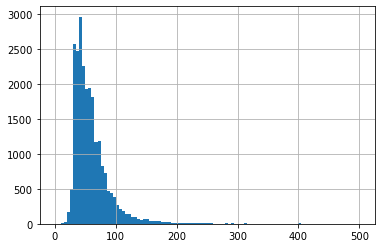

0    45.0
dtype: float64

In [5]:
import matplotlib.pyplot as plt
df['total_area'].hist(bins=100, range=(0, 500)) # распределение квартир по площади
plt.show()
df['total_area'].mode()

Судя по гистограмме, преобладают квартиры площадью менее 100 квадратных метров, пик приходится на значение 45 квадратных метров.

#### Цена

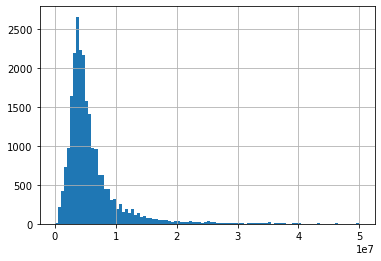

0    4500000.0
dtype: float64

In [6]:
df['last_price'].hist(bins=100, range=(0, 50000000))
plt.show()
df['last_price'].mode()


Максимальное значение в этом столбце 763 млн рублей, но основная масса значений распределена до 50 млн. Самая частая цена для квартир - 4,5 млн, ниже график относительно крутой, а выше - достаточно пологий.


#### Количество комнат

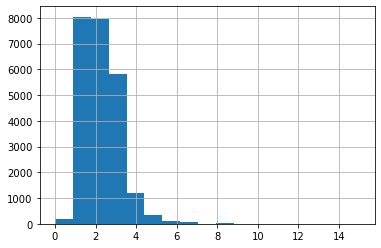

0    1
dtype: int64

In [7]:
df['rooms'].hist(bins=17, range=(0, 15))
plt.show()
df['rooms'].mode()

Ну, это ещё из этапа предобработки данных известно, максимум комнат в выборке - 19, здесь значения могут касаться нуля,
т.к. в выборке есть студии. Больше всего - однокомнатных квартир, а дальше, чем больше комнат, тем реже они встречаются

#### Высота потолков

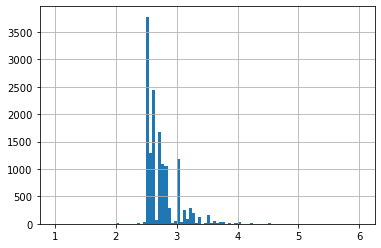

0    2.5
dtype: float64

In [68]:
df['ceiling_height'].hist(bins=100, range=(1, 6))
plt.show()
df['ceiling_height'].mode()

Распределение данных в столбце "ceiling_height" неудивительно, т.к. высота потолков типовая для определенных домов, 2,5 метра - самое частое значение, остальные значения распределены не равномерно, а в виде отдельных пиков, каждый из которых соответствует высоте потолка, характерной для домов разных серий.

#### Время продажи

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_psm,weekday,month,year,floor_category,living_ratio,kitchen_ratio
18843,18843,11,3500000.0,48.2,2014-12-15,2,2.5,5,27.4,2,...,NaN,NaN,1580.0,72614.107884,0,12,2014,другой,0.568465,0.159751


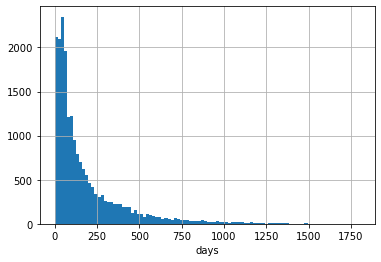

In [9]:

df['days_exposition'].hist(bins=100, range=(0, 1800))
plt.xlabel('days')
display(df['days_exposition'].describe())
df['days_exposition'].mode()
display(df.query('days_exposition == 1580'))

Самая большая плотность значений сконцентрирована в начале графика, а затем постепенно убывает. 3/4 продаж случаются меньше, чем через год с момента публикации объявления. Больше всего значений в выборке - 45 дней, медиана находится на отметке 95 дней, среднее значение 180 дней, есть подозрение, что среднее несколько завышено из-за неторопливых продавцов. Самый неспешный продавал квартиру 1580 дней, это более 4 лет. Числа вполне реальные, и, судя по графику, значения по мере удаления от пика встречаются всё реже. После 1000 дней значений уже очень мало

### Избавимся от выбросов
Лучший способ отделить выбросы  от остальных значений - посмотреть на диаграммы размаха.

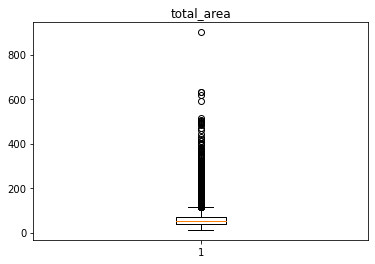

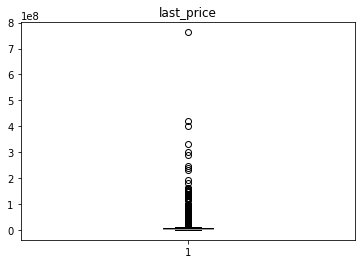

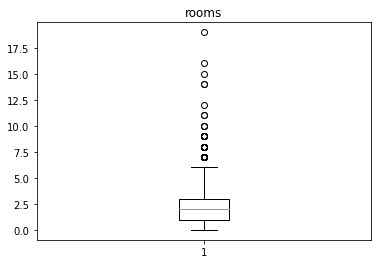

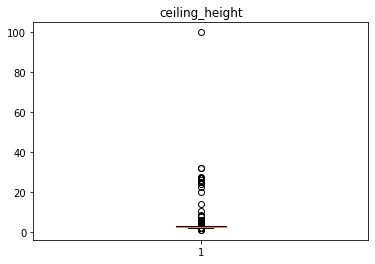

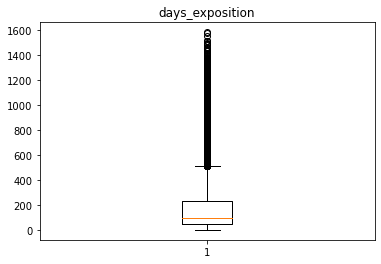

In [73]:
plt.boxplot(df['total_area'])
plt.title('total_area')
plt.show()
df_sorted = df.query('total_area <= 400')#отбросим значения больше 400
plt.boxplot(df['last_price'])
plt.title('last_price')
plt.show()
df_sorted = df_sorted.query('last_price <= 300000000')#отбросим значения больше 300 000 000
plt.boxplot(df['rooms'])
plt.title('rooms')
plt.show()
df_sorted = df_sorted.query('rooms <= 18')#отбросим значения больше 18
plt.boxplot(df['ceiling_height'].dropna()) #возможно диаграмма не строилась из-за большого числа пропусков
plt.title('ceiling_height')
plt.show()
df_sorted = df_sorted.query('ceiling_height <= 30')# отбросим значения больше 30 метров
plt.boxplot(df['days_exposition'].dropna())
plt.title('days_exposition')
plt.show()
df_sorted = df_sorted.query('days_exposition <= 1000')# отбросим значения больше 1000 дней

### Факторы, влияющие на стоимость квартиры

Нужно выяснить зависит ли цена от площади, числа комнат, удалённости от центра, зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, зависимость от даты размещения: дня недели, месяца и года.
Для того, чтобы ответить на эти вопросы, имеет смысл построить матрицу корреляции

In [103]:
price_corrs = df_sorted[['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area', 'kitchen_ratio', 'living_ratio', 'is_apartment', 'ponds_around3000', 'parks_around3000', 'days_exposition', 'cityCenters_nearest', 'floor_category', 'weekday', 'month', 'year']]
display(price_corrs.corr()) 

,last_price,total_area,rooms,living_area,kitchen_area,kitchen_ratio,living_ratio,is_apartment,ponds_around3000,parks_around3000,days_exposition,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.718366,0.425067,0.644698,0.536617,-0.096200,0.011659,0.006539,0.188761,0.205221,0.115639,-0.254998,-0.007770,0.001601,-0.086435
total_area,0.718366,1.000000,0.779949,0.941779,0.595298,-0.320494,0.164169,0.012087,0.174472,0.195543,0.165178,-0.245048,-0.015447,0.005167,-0.135644
rooms,0.425067,0.779949,1.000000,0.847013,0.271172,-0.558360,0.496433,-0.008095,0.097930,0.147181,0.137846,-0.183501,-0.009065,0.001569,-0.104008
living_area,0.644698,0.941779,0.847013,1.000000,0.412842,-0.474137,0.441246,0.013966,0.154999,0.200424,0.156782,-0.237066,-0.013185,-0.000023,-0.123369
kitchen_area,0.536617,0.595298,0.271172,0.412842,1.000000,0.453925,-0.341452,0.018322,0.148180,0.116792,0.113664,-0.192618,-0.022724,-0.002937,-0.093913
kitchen_ratio,-0.096200,-0.320494,-0.558360,-0.474137,0.453925,1.000000,-0.687407,0.008522,-0.015971,-0.078194,-0.044925,0.021751,-0.011674,-0.005373,0.031461
living_ratio,0.011659,0.164169,0.496433,0.441246,-0.341452,-0.687407,1.000000,0.006133,-0.005714,0.080526,0.021890,-0.034816,0.006187,-0.014381,-0.000937
is_apartment,0.006539,0.012087,-0.008095,0.013966,0.018322,0.008522,0.006133,1.000000,0.021622,0.018030,-0.002631,0.021109,-0.004409,-0.003295,0.021608
ponds_around3000,0.188761,0.174472,0.097930,0.154999,0.148180,-0.015971,-0.005714,0.021622,1.000000,0.320272,0.068398,-0.063505,-0.006530,-0.011266,-0.052563
parks_around3000,0.205221,0.195543,0.147181,0.200424,0.116792,-0.078194,0.080526,0.018030,0.320272,1.000000,0.062625,-0.143402,-0.004207,-0.007936,-0.053749


Есть высокая прямая корреляция между стоимостью жилья и его площадью, средняя - с жилой площадью и площадью кухни, слабая корреляция между количеством комнат и стоимостью жилья, очень слабая положительная связь между наличием парков и водоемов поблизости, очень слабая отрицательная корреляция между расстоянием до центра города и стоимостью жилья, т.е. чем ближе к центру, тем дороже; значимой связи между временем публикации объявления и стоимостью квартиры при продаже нет, однако есть очень слабая положительная связь стоимости с продолжительностью публикации объявления: более дорогие квартиры продавались несколько дольше.

### Топ-10
Населенные пункты с наибольшим количеством объявлений о продаже квартир

In [75]:
df_sorted.groupby(['locality_name']).count().sort_values(by=['last_price'], ascending=False).head(10)

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_psm,weekday,month,year,floor_category,living_ratio,kitchen_ratio
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,8250,8250,8250,8250,8250,8250,8250,8246,8250,8250,...,8239,4060,8250,8250,8250,8250,8250,8250,8250,8250
Всеволожск,220,220,220,220,220,220,220,220,220,220,...,0,0,220,220,220,220,220,220,220,220
посёлок Мурино,197,197,197,197,197,197,197,197,197,197,...,0,0,197,197,197,197,197,197,197,197
посёлок Шушары,188,188,188,188,188,188,188,187,188,188,...,186,55,188,188,188,188,188,188,188,188
Пушкин,184,184,184,184,184,184,184,184,184,184,...,184,90,184,184,184,184,184,184,184,184
Колпино,178,178,178,178,178,178,178,178,178,178,...,178,97,178,178,178,178,178,178,178,178
Гатчина,126,126,126,126,126,126,126,126,126,126,...,0,0,126,126,126,126,126,126,126,126
Петергоф,122,122,122,122,122,122,122,122,122,122,...,122,77,122,122,122,122,122,122,122,122
посёлок Парголово,119,119,119,119,119,119,119,119,119,119,...,119,20,119,119,119,119,119,119,119,119


In [76]:
top10 = ['Санкт-Петербург', 'Всеволожск', 'посёлок Мурино', 'посёлок Шушары', 'Пушкин', 'Колпино', 'Петергоф', 'Гатчина', 'деревня Кудрово', 'посёлок Парголово']
top10table = df_sorted.query('locality_name in @top10')
pd.pivot_table(top10table, index=['locality_name'], values=['price_psm']).sort_values(by='price_psm', ascending=False)


,price_psm
locality_name,
Санкт-Петербург,112330.752644
Пушкин,102096.954382
деревня Кудрово,90739.286196
посёлок Парголово,89466.812622
посёлок Мурино,87415.338207
Петергоф,83343.808559
посёлок Шушары,78567.335687
Колпино,75018.542213
Гатчина,69148.511853


В сводной таблице представлены средние значения цены за квадратный метр. Самая высокая стоимостью жилья в Санкт-Петербурге и в Пушкине. Самая низкая в Гатчине и Всеволожске.

### Расстояние до центра

C:\Users\dande\AppData\Local\Temp/ipykernel_5484/736209895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['km_to_center'] = (spb['cityCenters_nearest'] / 1000).round(0) #километры в метры и округлим до целых


<AxesSubplot:xlabel='km_to_center', ylabel='last_price'>

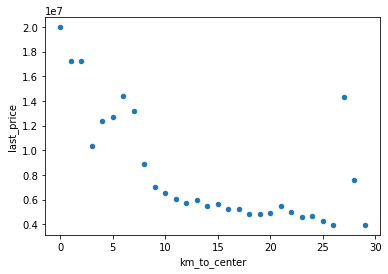

In [77]:
# выделим квартиры в Санкт-Петербурге
spb = df_sorted.query('locality_name == "Санкт-Петербург"')
spb['km_to_center'] = (spb['cityCenters_nearest'] / 1000).round(0) #километры в метры и округлим до целых
price_center = spb[['km_to_center', 'last_price']]
price_center = pd.pivot_table(price_center, index=['km_to_center'], aggfunc='mean').reset_index().sort_values(by=['km_to_center'])
price_center.plot(x='km_to_center', y='last_price', kind='scatter') 


Ну, судя по графику, зависимость приобретает линейный характер начиная с 10 км до центра города.

### Квартиры в центре

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [108]:
spb_center = spb.query('km_to_center <= 10') # квартиры в центре
spb_center = spb_center[['last_price', 'total_area', 'rooms', 'ceiling_height', 'floor_category', 'weekday', 'month', 'year', 'living_area', 'kitchen_area', 'kitchen_ratio', 'living_ratio', 'is_apartment', 'ponds_around3000', 'parks_around3000', 'days_exposition', 'km_to_center', 'cityCenters_nearest']]
# выделила только нужные для анализа столбцы

#### Площадь квартир

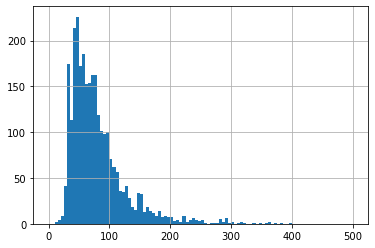

68.0

In [85]:
spb_center['total_area'].hist(bins=100, range=(0, 500)) # распределение квартир по площади
plt.show()
spb_center['total_area'].mode()
spb_center['total_area'].median()

Распределение по площади в центре шире, чем в остальной части города, а пик приходится на квартиры с меньшей площадью - 31 кв.м. Возможно это связано с большим количеством коммунальных квартир в центре. Можно сделать вывод, что в центре города сосредоточены и самые большие, и самые маленькие квартиры.

#### Цена 

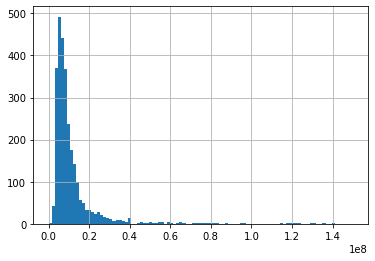

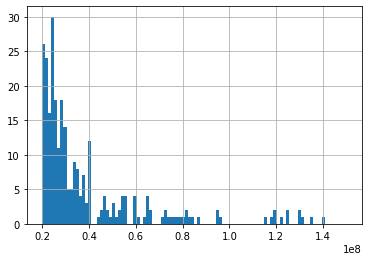

In [91]:
spb_center['last_price'].hist(bins=100, range=(0, 150000000))
plt.show()
spb_center['last_price'].mode()
spb_center['last_price'].hist(bins=100, range=(20000000, 150000000))
plt.show()

Квартиры в центре дороже, это было заметно ещё на диаграмме рассеивания.

#### Количество комнат

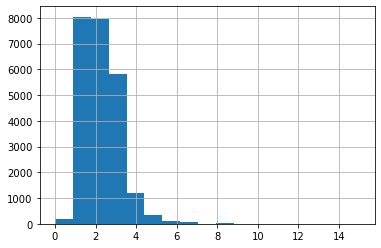

0    1
dtype: int64

In [92]:
spb_center['rooms'].hist(bins=17, range=(0, 15))
plt.show()
spb_center['rooms'].mode()

Как и предполагалось ранее, в центре продается очень много маленьких квартир-комнат в коммунальных квартирах.

#### Высота потолков

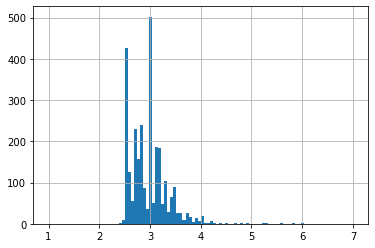

0    3.0
dtype: float64

In [98]:
spb_center['ceiling_height'].hist(bins=100, range=(1, 7))
plt.show()
spb_center['ceiling_height'].mode()

В среднем, потолки в центре горда значительно выше, мода находится на значении 3 метра, хотя пик на 2,5 метрах тоже присутствует

#### Факторы, влияющие на стоимость квартиры

In [109]:
display(spb_center.corr()) # построим матрицу корреляции

,last_price,total_area,rooms,ceiling_height,weekday,month,year,living_area,kitchen_area,kitchen_ratio,living_ratio,is_apartment,ponds_around3000,parks_around3000,days_exposition,km_to_center,cityCenters_nearest
last_price,1.000000,0.706927,0.424784,0.121452,-0.006396,-0.000781,-0.125448,0.628199,0.521411,-0.095244,-0.011722,0.001765,0.166652,0.188043,0.153390,-0.209539,-0.209638
total_area,0.706927,1.000000,0.791674,0.152210,-0.024486,0.010852,-0.171016,0.948325,0.570974,-0.311395,0.151762,-0.009949,0.133905,0.176734,0.206853,-0.312584,-0.313987
rooms,0.424784,0.791674,1.000000,0.109376,-0.030869,0.008976,-0.137491,0.839024,0.311067,-0.474441,0.415643,-0.015429,0.081369,0.145079,0.179518,-0.305746,-0.308522
ceiling_height,0.121452,0.152210,0.109376,1.000000,-0.039595,-0.002487,-0.044806,0.156755,0.103946,-0.022451,0.073069,0.171934,0.058422,0.082364,0.050635,-0.176638,-0.176546
weekday,-0.006396,-0.024486,-0.030869,-0.039595,1.000000,0.001816,0.019496,-0.027654,-0.029764,-0.009007,-0.014284,-0.022063,0.023570,0.000590,-0.021541,0.031103,0.029745
month,-0.000781,0.010852,0.008976,-0.002487,0.001816,1.000000,-0.226114,0.009278,-0.020230,-0.027273,-0.001473,-0.001479,0.005657,-0.020227,-0.021785,-0.036823,-0.037482
year,-0.125448,-0.171016,-0.137491,-0.044806,0.019496,-0.226114,1.000000,-0.158070,-0.105317,0.052749,-0.006717,0.030346,-0.047893,-0.050271,-0.611566,0.142707,0.143455
living_area,0.628199,0.948325,0.839024,0.156755,-0.027654,0.009278,-0.158070,1.000000,0.406646,-0.446346,0.413137,0.002896,0.106447,0.180298,0.194021,-0.310837,-0.313113
kitchen_area,0.521411,0.570974,0.311067,0.103946,-0.029764,-0.020230,-0.105317,0.406646,1.000000,0.484023,-0.335331,-0.021230,0.132342,0.145590,0.165299,-0.217432,-0.217179
kitchen_ratio,-0.095244,-0.311395,-0.474441,-0.022451,-0.009007,-0.027273,0.052749,-0.446346,0.484023,1.000000,-0.654396,-0.014470,-0.004071,-0.023797,-0.023241,0.082752,0.084267


Матрица корреляции в целом очень похожа на общую матрицу (по Санкт-Петербургу и Ленинградской области). Есть высокая прямая корреляция между стоимостью жилья и его площадью, средняя связь между жилой площадью, а также площадью кухни и стоимостью жилья, слабая корреляция между количеством комнат и стоимостью жилья, очень слабая отрицательная корреляция между расстоянием до центра города и стоимостью жилья, т.е. чем ближе к центру, тем дороже; очень слабая положительная корреляция стоимости квартиры и наличия парков и водоемов поблизости, значимой связи между временем публикации объявления и стоимостью квартиры при продаже нет, однако более выражена очень слабая отрицательная корреляция между годом продажи и стоимостью жилья, как будто со времененем стоимость жилья в центре немного падает.

## Общий вывод

Проведен анализ объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области. Больше всего было квартир в Санкт-Петербурге, кроме того, отдельно проанализирован центр Санкт-Петербурга. Самая высокая стоимость жилья в Санкт-Петербурге и Пушкине, причем уровень цен заметно не отличается. Цена почти напрямую зависит от площади квартиры, и  связана с количеством комнат, но корреляция слабая, также имеется очень слабо выраженная зависимость стоимости квартиры от расстояния до центра города, чем ближе, тем дороже. Ещё в центре города есть очень слабая корреляция между высотой потолков и стоимостью жилья. В центре в целом выше потолки, но меньше площадь квартир - из-за большого количества коммунальных квартир в выборке. 
Иногда отсутствие связи так же важно, как и её наличие. Например, значимой разницы между стоимостью квартир и апартаментов не было найдено. Соотношение жилой/нежилой площади так же не влияет на стоимость квартир, она зависит только от общей площади.



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод